In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('store_sharing.csv')

In [3]:
df.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0


In [4]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

In [6]:
df.nunique()

timestamp       17414
cnt              3781
t1                 73
t2                 82
hum               143
wind_speed        103
weather_code        7
is_holiday          2
is_weekend          2
season              4
dtype: int64

In [7]:
pd.to_datetime(df['timestamp']).dt.date

0        2015-01-04
1        2015-01-04
2        2015-01-04
3        2015-01-04
4        2015-01-04
            ...    
17409    2017-01-03
17410    2017-01-03
17411    2017-01-03
17412    2017-01-03
17413    2017-01-03
Name: timestamp, Length: 17414, dtype: object

In [8]:
import datetime as dt
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [9]:
df['hour'] = df.timestamp.dt.hour
df['day_of_month'] = df.timestamp.dt.day
df['day_of_week'] = df.timestamp.dt.dayofweek
df['month'] = df.timestamp.dt.month
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19,3,1,1
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20,3,1,1
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21,3,1,1
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,22,3,1,1


In [10]:
# df['Date'] = pd.to_datetime(df['timestamp']).dt.date

In [11]:
# pd.to_datetime(df['timestamp']).dt.time

In [12]:
# df['Time'] = pd.to_datetime(df['timestamp']).dt.time

In [13]:
# df = df.drop('timestamp', axis =1)

In [14]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19,3,1,1
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20,3,1,1
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21,3,1,1
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,22,3,1,1


In [15]:
#df2['weather_code'].astype('int')

In [16]:
# df2['weather_code'] = df2['weather_code'].astype('int')

In [17]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
hour            0
day_of_month    0
day_of_week     0
month           0
dtype: int64

In [18]:
df.duplicated().value_counts()

False    17414
dtype: int64

<AxesSubplot:>

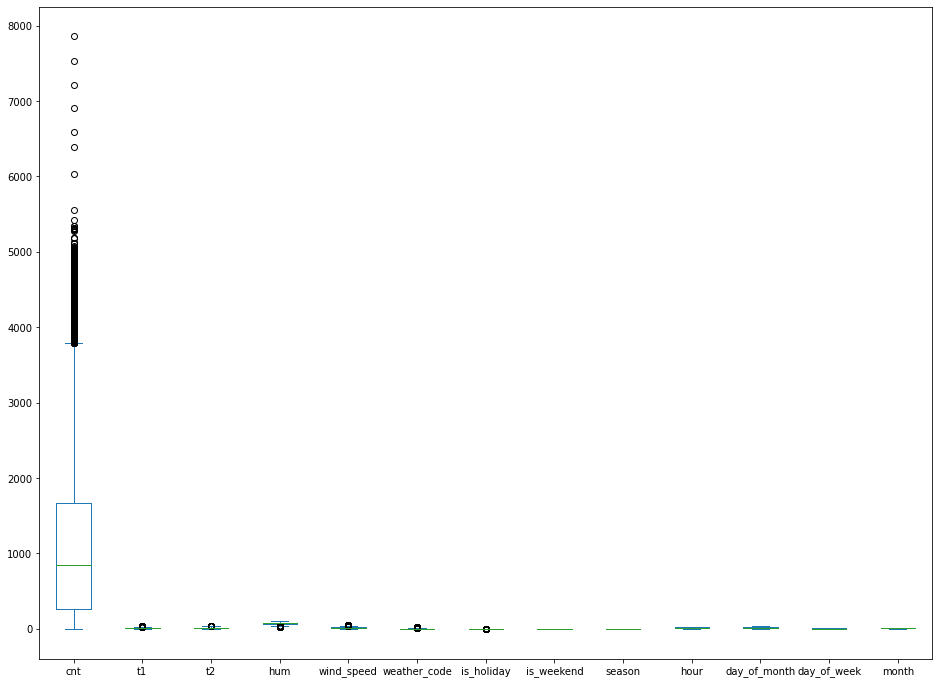

In [19]:
df.plot(kind = 'box', figsize=(16, 12))

<AxesSubplot:>

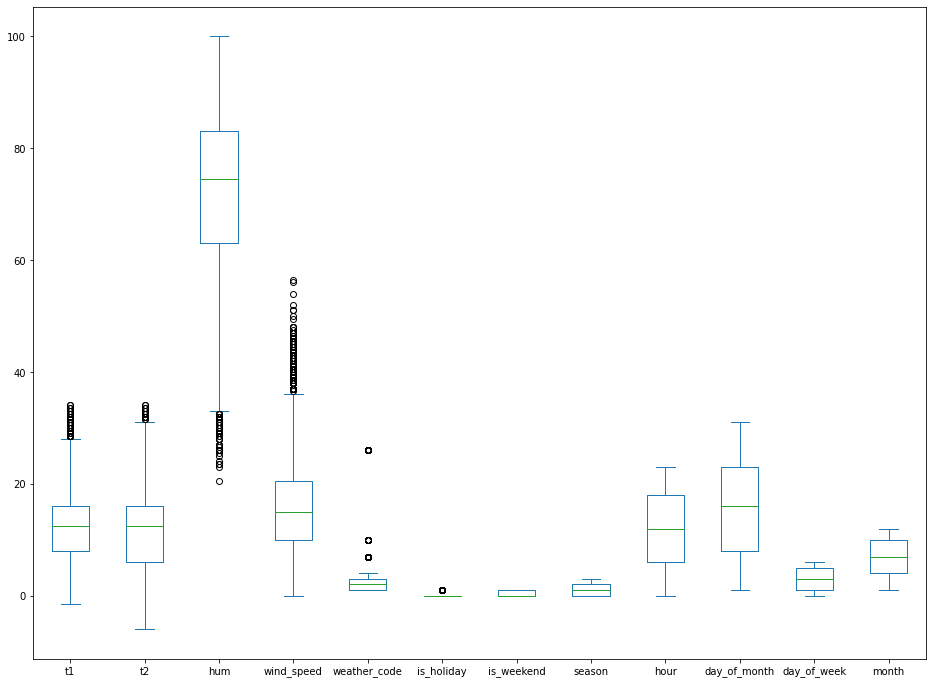

In [20]:
df.drop('cnt', 1).plot(kind = 'box', figsize=(16, 12))

<AxesSubplot:ylabel='Frequency'>

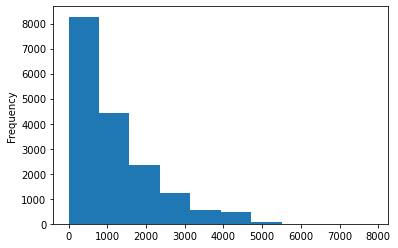

In [21]:
df['cnt'].plot(kind = 'hist')

In [22]:
df4 = df.drop('timestamp', axis=1)

In [23]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
df_robust2 = robust.fit_transform(df4)

df_robust = pd.DataFrame(df_robust2)
df_robust.columns = df4.columns

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_log3 = scaler.fit_transform(df4)

df_scale2 = pd.DataFrame(df_log3)
df_scale2.columns = df4.columns

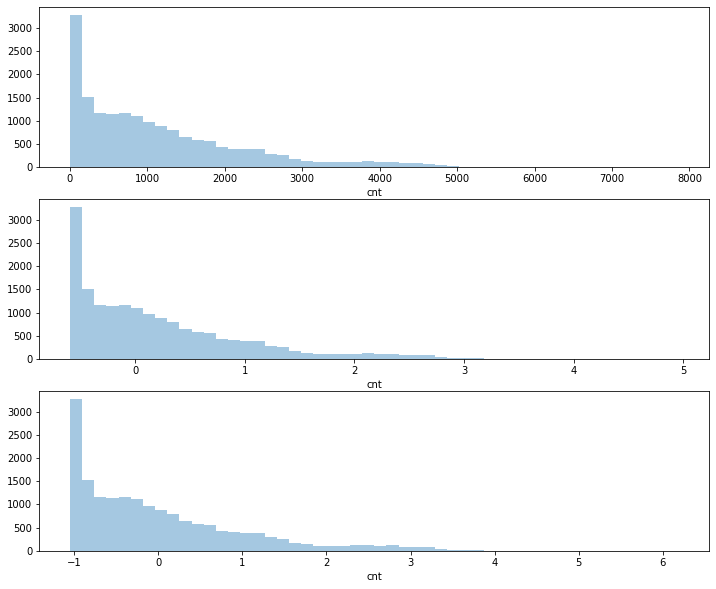

In [25]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(df['cnt'], kde = False)
plt.subplot(3, 1, 2); sns.distplot(df_robust['cnt'], kde = False)
plt.subplot(3, 1, 3); sns.distplot(df_scale2['cnt'], kde = False)

plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

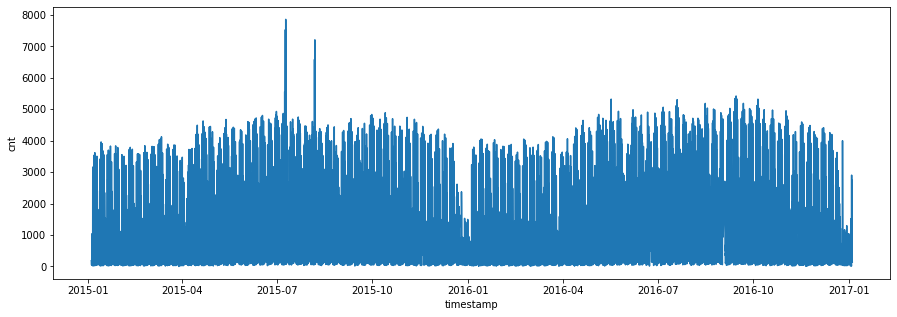

In [26]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df["timestamp"], y="cnt",data=df)

<AxesSubplot:xlabel='month', ylabel='cnt'>

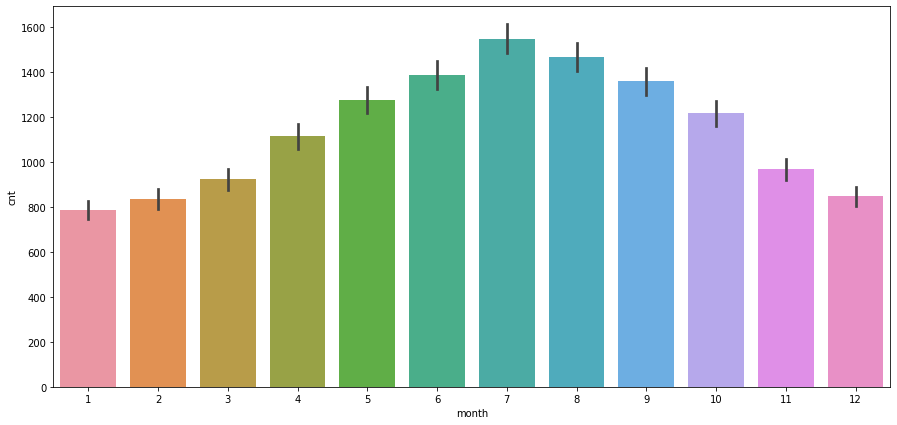

In [27]:
plt.figure(figsize=(15,7))
sns.barplot(x="month", y ="cnt", data=df)

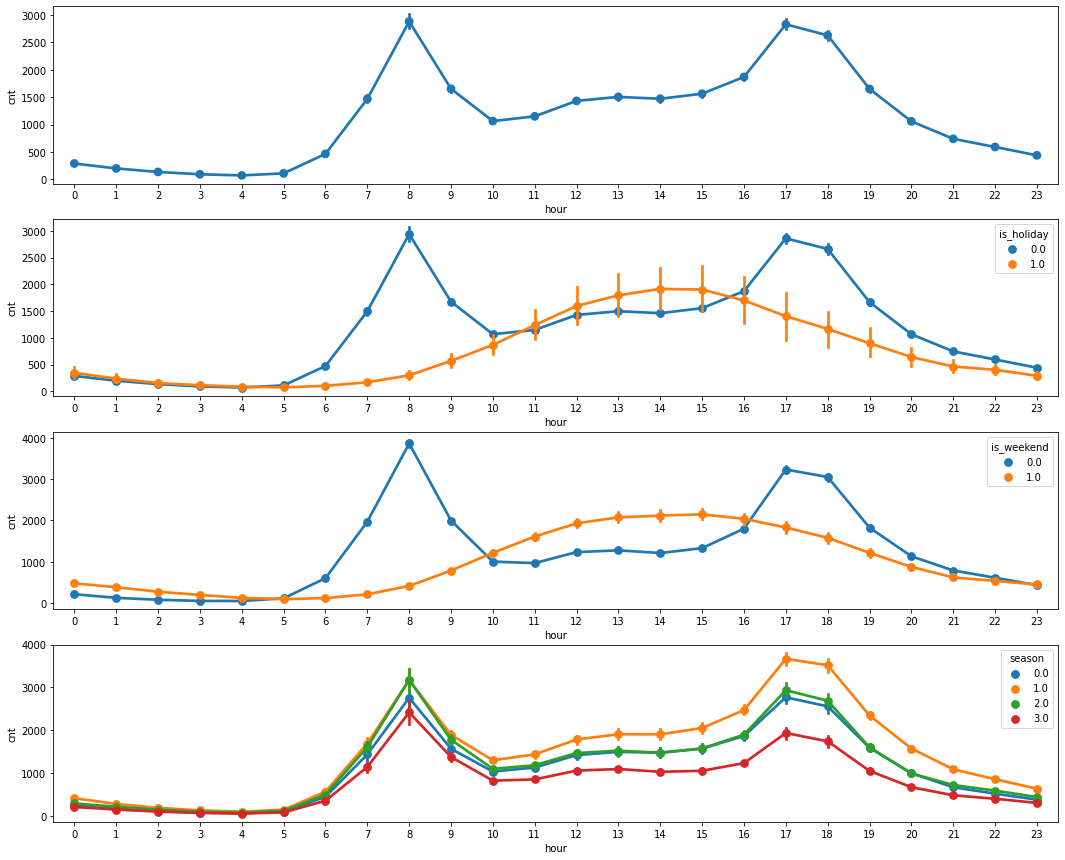

In [28]:
fig,(ax1, ax2, ax3, ax4)= plt.subplots(nrows=4)
fig.set_size_inches(18, 15)

sns.pointplot(data=df, x='hour', y='cnt', ax=ax1)
sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday', ax=ax2)
sns.pointplot(data=df, x='hour', y='cnt', hue='is_weekend', ax=ax3)
sns.pointplot(data=df, x='hour', y='cnt', hue='season', ax=ax4);

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

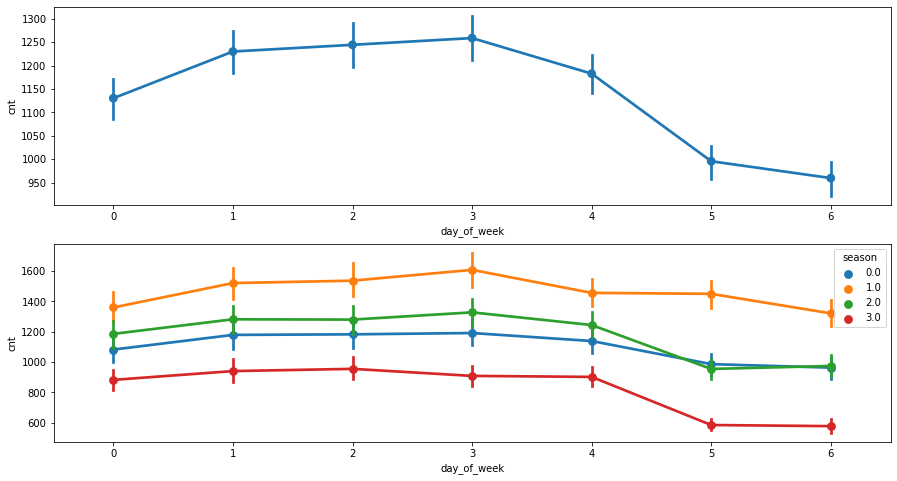

In [29]:
fig,(ax1, ax2)= plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.pointplot(data=df, x='day_of_week', y='cnt',ax=ax1)
sns.pointplot(x="day_of_week",y="cnt", data = df,hue="season",ax=ax2)

<AxesSubplot:xlabel='season', ylabel='cnt'>

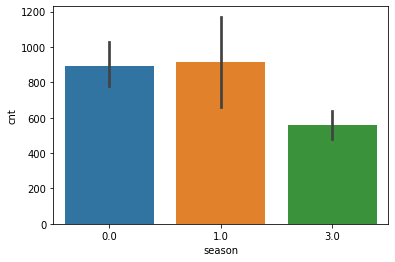

In [30]:
sns.barplot(x="season",y="cnt", data = df[df["is_holiday"]==1])

In [31]:
df = df.set_index('timestamp',drop=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1


In [32]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1


In [33]:
df.drop('t1', 1, inplace=True)

In [34]:
df.head(1)

,cnt,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,
2015-01-04,182,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1


In [35]:
df

,cnt,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,182,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19,3,1,1
2017-01-03 20:00:00,541,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20,3,1,1
2017-01-03 21:00:00,337,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21,3,1,1


In [36]:
train, test = df.iloc[0:int(len(df) * 0.9)], df.iloc[int(len(df) * 0.9):len(df)]

In [37]:
print(len(train), len(test))

15672 1742


In [38]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [39]:
train[['t2', 'hum', 'wind_speed']] = rs.fit_transform(train[['t2', 'hum', 'wind_speed']])
test[['t2', 'hum', 'wind_speed']] = rs.transform(test[['t2', 'hum', 'wind_speed']])

In [40]:
def create_dataset(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [41]:
time_steps = 10

In [42]:
X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)

(15662, 10, 12) (15662,)


In [43]:
print(X_test.shape, y_test.shape)

(1732, 10, 12) (1732,)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout

### Plot Train and Validation Losses

In [45]:
model = Sequential()

model.add(Bidirectional(LSTM(units=128,input_shape=(X_train.shape[1], X_train.shape[2]))))

model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mse')

2022-03-07 03:57:52.042532: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
model.fit(x = X_train, y = y_train, 
          validation_data = (X_test, y_test),
         batch_size = 128, epochs = 200)

2022-03-07 03:57:52.197621: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


NotImplementedError: in user code:

    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:850 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:840 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:833 run_step  **
        outputs = model.train_step(data)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:790 train_step
        y_pred = self(x, training=True)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:394 call
        outputs = layer(inputs, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/layers/wrappers.py:585 __call__
        return super(Bidirectional, self).__call__(inputs, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/layers/wrappers.py:698 call
        y = self.forward_layer(forward_inputs,
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:668 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent_v2.py:1153 call
        inputs, initial_state, _ = self._process_inputs(inputs, initial_state, None)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:868 _process_inputs
        initial_state = self.get_initial_state(inputs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:650 get_initial_state
        init_state = get_initial_state_fn(
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:2516 get_initial_state
        return list(_generate_zero_filled_state_for_cell(
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:2998 _generate_zero_filled_state_for_cell
        return _generate_zero_filled_state(batch_size, cell.state_size, dtype)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:3014 _generate_zero_filled_state
        return nest.map_structure(create_zeros, state_size)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/util/nest.py:867 map_structure
        structure[0], [func(*x) for x in entries],
    /usr/local/lib/python3.9/site-packages/tensorflow/python/util/nest.py:867 <listcomp>
        structure[0], [func(*x) for x in entries],
    /usr/local/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:3011 create_zeros
        return array_ops.zeros(init_state_size, dtype=dtype)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/ops/array_ops.py:2911 wrapped
        tensor = fun(*args, **kwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/ops/array_ops.py:2960 zeros
        output = _constant_if_small(zero, shape, dtype, name)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/ops/array_ops.py:2896 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:5 prod
        
    /usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3030 prod
        return _wrapreduction(a, np.multiply, 'prod', axis, dtype, out,
    /usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87 _wrapreduction
        return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
    /usr/local/lib/python3.9/site-packages/tensorflow/python/framework/ops.py:867 __array__
        raise NotImplementedError(

    NotImplementedError: Cannot convert a symbolic Tensor (sequential/bidirectional/forward_lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported


In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

---
---

## Demand Predictions

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0, len(y_train)), y_train.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_test.flatten(), marker='.', label="true")
plt.plot(y_pred.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))